Abstrakt projektu : "Stacja pogodowo - wstrząsowa zbiera dane na temat temperatury i wilgotności co dwie minuty oraz wykrywa silne wstrząsy ziemi - takie, które trwają dłużej niż 3x0.25 sekundy. W przypadku wystąpienia takiego wstrząsu jest mierzony czas jego trwania oraz temperatura i wilgotność panujące w tym czasie. Następnie tworzony jest wykres wszystkich zebranych dancyh, którego interpretacja pozwala stwierdzić, czy istnieje związek między trzęsieniami ziemi oraz wartościami temperatury i wilgotności powietrza."

Dane zebrane przez czas pracy stacji (np. przez wstępnie ustalone pół godziny) są zapisywane na kartę SD, aby można było uzyskać do nich dostęp w każdej chwili, a także są wyświetlane w monitorze portu szeregowego programu Arduino, dzięki czemu będzie je można przekopiować ręcznie w razie problemów z pobieraniem ich z karty SD.

Poniżej przykładowa komenda pobierania danych zapisanych na karcie SD :

In [ ]:
with open('E:/dane01.txt', 'r') as file:
    data = file.read()
    print(data)

Analiza zapisanych danych - wykrycie wstrząsu, ile trwał, jaka była wtedy temperatura i wilgotność :
* 1️⃣ Zliczanie wstrząsów: Program liczy liczbę wstrząsów, które występują w ciągu jednej minuty.
* 2️⃣ Mierzenie czasu trwania wstrząsu: Czas trwania wstrząsu mierzony będzie za pomocą zmiennej shockDuration.
* 3️⃣ Sprawdzanie liczby wstrząsów w ciągu minuty: Po każdym wstrząsie jest on zliczany, licznik resetowany jest po upływie minuty.
   -> jeśli w ciągu minuty jest więcej niż trzy wstrząsy, to wtedy określany jest jako pełny wstrząs - niebezpieczeństwo + PODANY CZAS TRWANIA ORAZ JAKIE BYŁY WTEDY TEMPERATURA I WILGOTNOŚĆ
* 4️⃣ Dane są zapisywane na kartę SD do pliku (przykładowa nazwa - dane01.txt) (w razie potrzeby, przy każdej inicjalizacji są tworzone też dodatkowe, puste pliki)
* 5️⃣ Stacja działa przez 30 minut od momentu włączenia. Przez ten czas są rejestrowane dane i zapisywane na kartę SD (wilgotność i temperatura, oraz czas wstrząsu i panujące podczas niego temperatura i wilgotność)

Program tworzy także wykres danych - zawierający w sobie momenty, gdy występują duże wstrząsy oraz ich trwanie (milisekundy/sekundy) + linie przedstawiające temperaturę i wilgotność - dzięki temu wykresowi będzie można zobaczyć, czy zmieniały się one w czasie niebezpiecznych trzęsień.

Przykładowy wykres dla podanej ręcznie paczki danych (dla czytelności wykresu wartości czasu są podane w oryginalnych milisekundach):

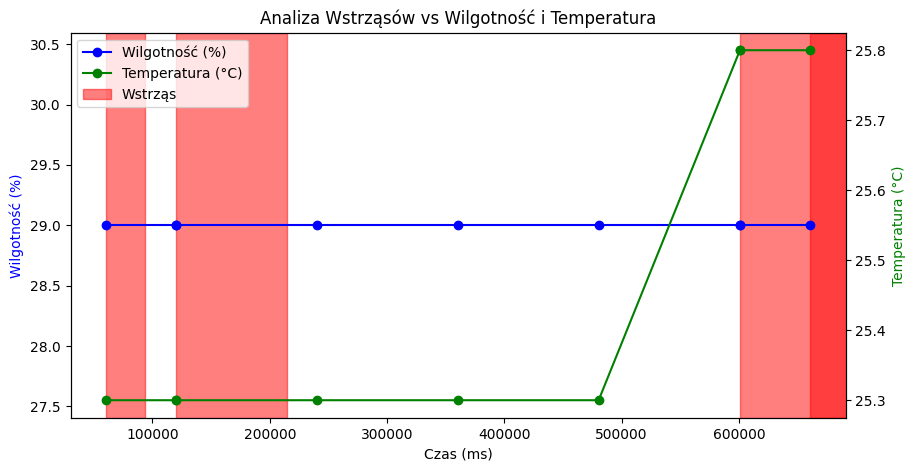

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Dane testowe
sample_data = [
    (60161, 29.00, 25.30, 33725),
    (120373, 29.00, 25.30, 93937),
    (120419, 29.00, 25.30, 0),
    (240403, 29.00, 25.30, 0),
    (360402, 29.00, 25.30, 0),
    (480403, 29.00, 25.30, 0),
    (600863, 29.00, 25.80, 574427),
    (600910, 29.00, 25.80, 0),
    (660864, 29.00, 25.80, 634427)
]

# Przetwarzanie danych
czas = [d[0] for d in sample_data]
wilgotnosc = [d[1] for d in sample_data]
temperatura = [d[2] for d in sample_data]
wstrzasy = [(d[0], d[3]) for d in sample_data if d[3] > 0]

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Wykres temperatury i wilgotności
line1, = ax1.plot(czas, wilgotnosc, 'bo-', label='Wilgotność (%)')
line2, = ax2.plot(czas, temperatura, 'go-', label='Temperatura (°C)')

# Oznaczenie wstrząsów
for start, duration in wstrzasy:
    ax1.axvspan(start, start + duration, color='red', alpha=0.5)

# Tworzenie legendy dla wstrząsów
wstrzas_patch = mpatches.Patch(color='red', alpha=0.5, label='Wstrząs')

# Opisy osi i legenda
ax1.set_xlabel('Czas (ms)')
ax1.set_ylabel('Wilgotność (%)', color='blue')
ax2.set_ylabel('Temperatura (°C)', color='green')

# Łączenie legend
lines = [line1, line2, wstrzas_patch]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Analiza Wstrząsów vs Wilgotność i Temperatura')
plt.show()


Jednak ogólnie, przy większych paczkach danych (np. przy półgodzinnej pracy stacji), oś X wykresu jest wyskalowana w sekundach

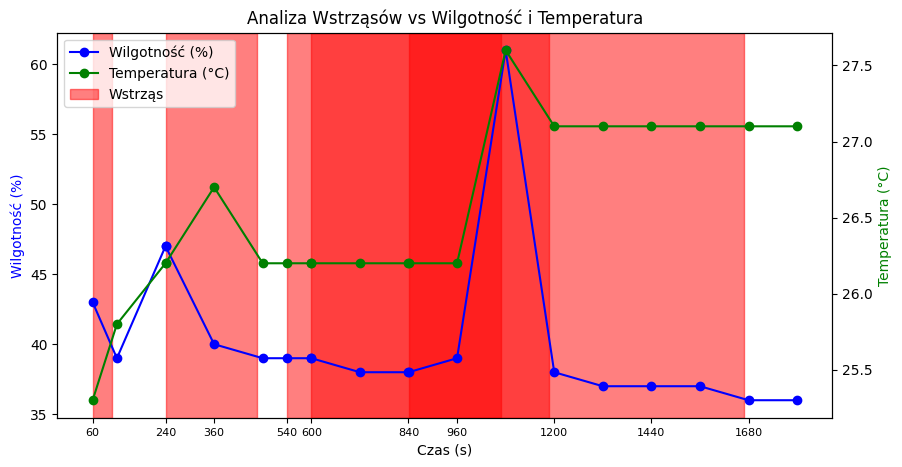

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Dane testowe
sample_data = [
    (60054, 43.00, 25.30, 47013),
    (120023, 39.00, 25.80, 0),
    (240055, 47.00, 26.20, 227013),
    (240102, 47.00, 26.20, 0),
    (360085, 40.00, 26.70, 0),
    (480084, 39.00, 26.20, 0),
    (540401, 39.00, 26.20, 527359),
    (600085, 39.00, 26.20, 0),
    (600402, 39.00, 26.20, 587338),
    (720084, 38.00, 26.20, 0),
    (840085, 38.00, 26.20, 0),
    (840402, 38.00, 26.20, 827338),
    (960084, 39.00, 26.20, 0),
    (1080086, 61.00, 27.60, 0),
    (1200084, 38.00, 27.10, 0),
    (1320085, 37.00, 27.10, 0),
    (1440084, 37.00, 27.10, 0),
    (1560085, 37.00, 27.10, 0),
    (1680084, 36.00, 27.10, 0),
    (1800085, 36.00, 27.10, 0)
]

# Przetwarzanie danych
czas = [d[0] for d in sample_data]
wilgotnosc = [d[1] for d in sample_data]
temperatura = [d[2] for d in sample_data]
wstrzasy = [(d[0], d[3]) for d in sample_data if d[3] > 0]

# Konwersja czasu na sekundy
czas = [t / 1000 for t in czas]
wstrzasy = [(t / 1000, d / 1000) for t, d in wstrzasy]

# Tworzenie wykresu
fig, ax1 = plt.subplots(figsize=(10, 5))
ax2 = ax1.twinx()

# Wykres temperatury i wilgotności
line1, = ax1.plot(czas, wilgotnosc, 'bo-', label='Wilgotność (%)')
line2, = ax2.plot(czas, temperatura, 'go-', label='Temperatura (°C)')

# Oznaczenie wstrząsów
for start, duration in wstrzasy:
    ax1.axvspan(start, start + duration, color='red', alpha=0.5)

# Tworzenie legendy dla wstrząsów
wstrzas_patch = mpatches.Patch(color='red', alpha=0.5, label='Wstrząs')

# Opisy osi i legenda
ax1.set_xlabel('Czas (s)')
ax1.set_ylabel('Wilgotność (%)', color='blue')
ax2.set_ylabel('Temperatura (°C)', color='green')

# Ustawienie co drugiej wartości na osi X i zmniejszenie czcionki
ax1.set_xticks(czas[::2])
ax1.set_xticklabels([str(int(t)) for t in czas[::2]], fontsize=8)

# Łączenie legend
lines = [line1, line2, wstrzas_patch]
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Analiza Wstrząsów vs Wilgotność i Temperatura')
plt.show()


Dzięki zebranym danym możliwe będzie analizowanie ewentualnego wpływu na siebie wilgotności i temperatury oraz występowania wstrząsów ziemi. W dalszych etapach, dzięki uczeniu maszynowemu i trenowaniu na podstawie zbieranych danych, będzie można przewidywać zmiany temperatury i wilgotności bądź występowanie trzęsień ziemi.